In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지

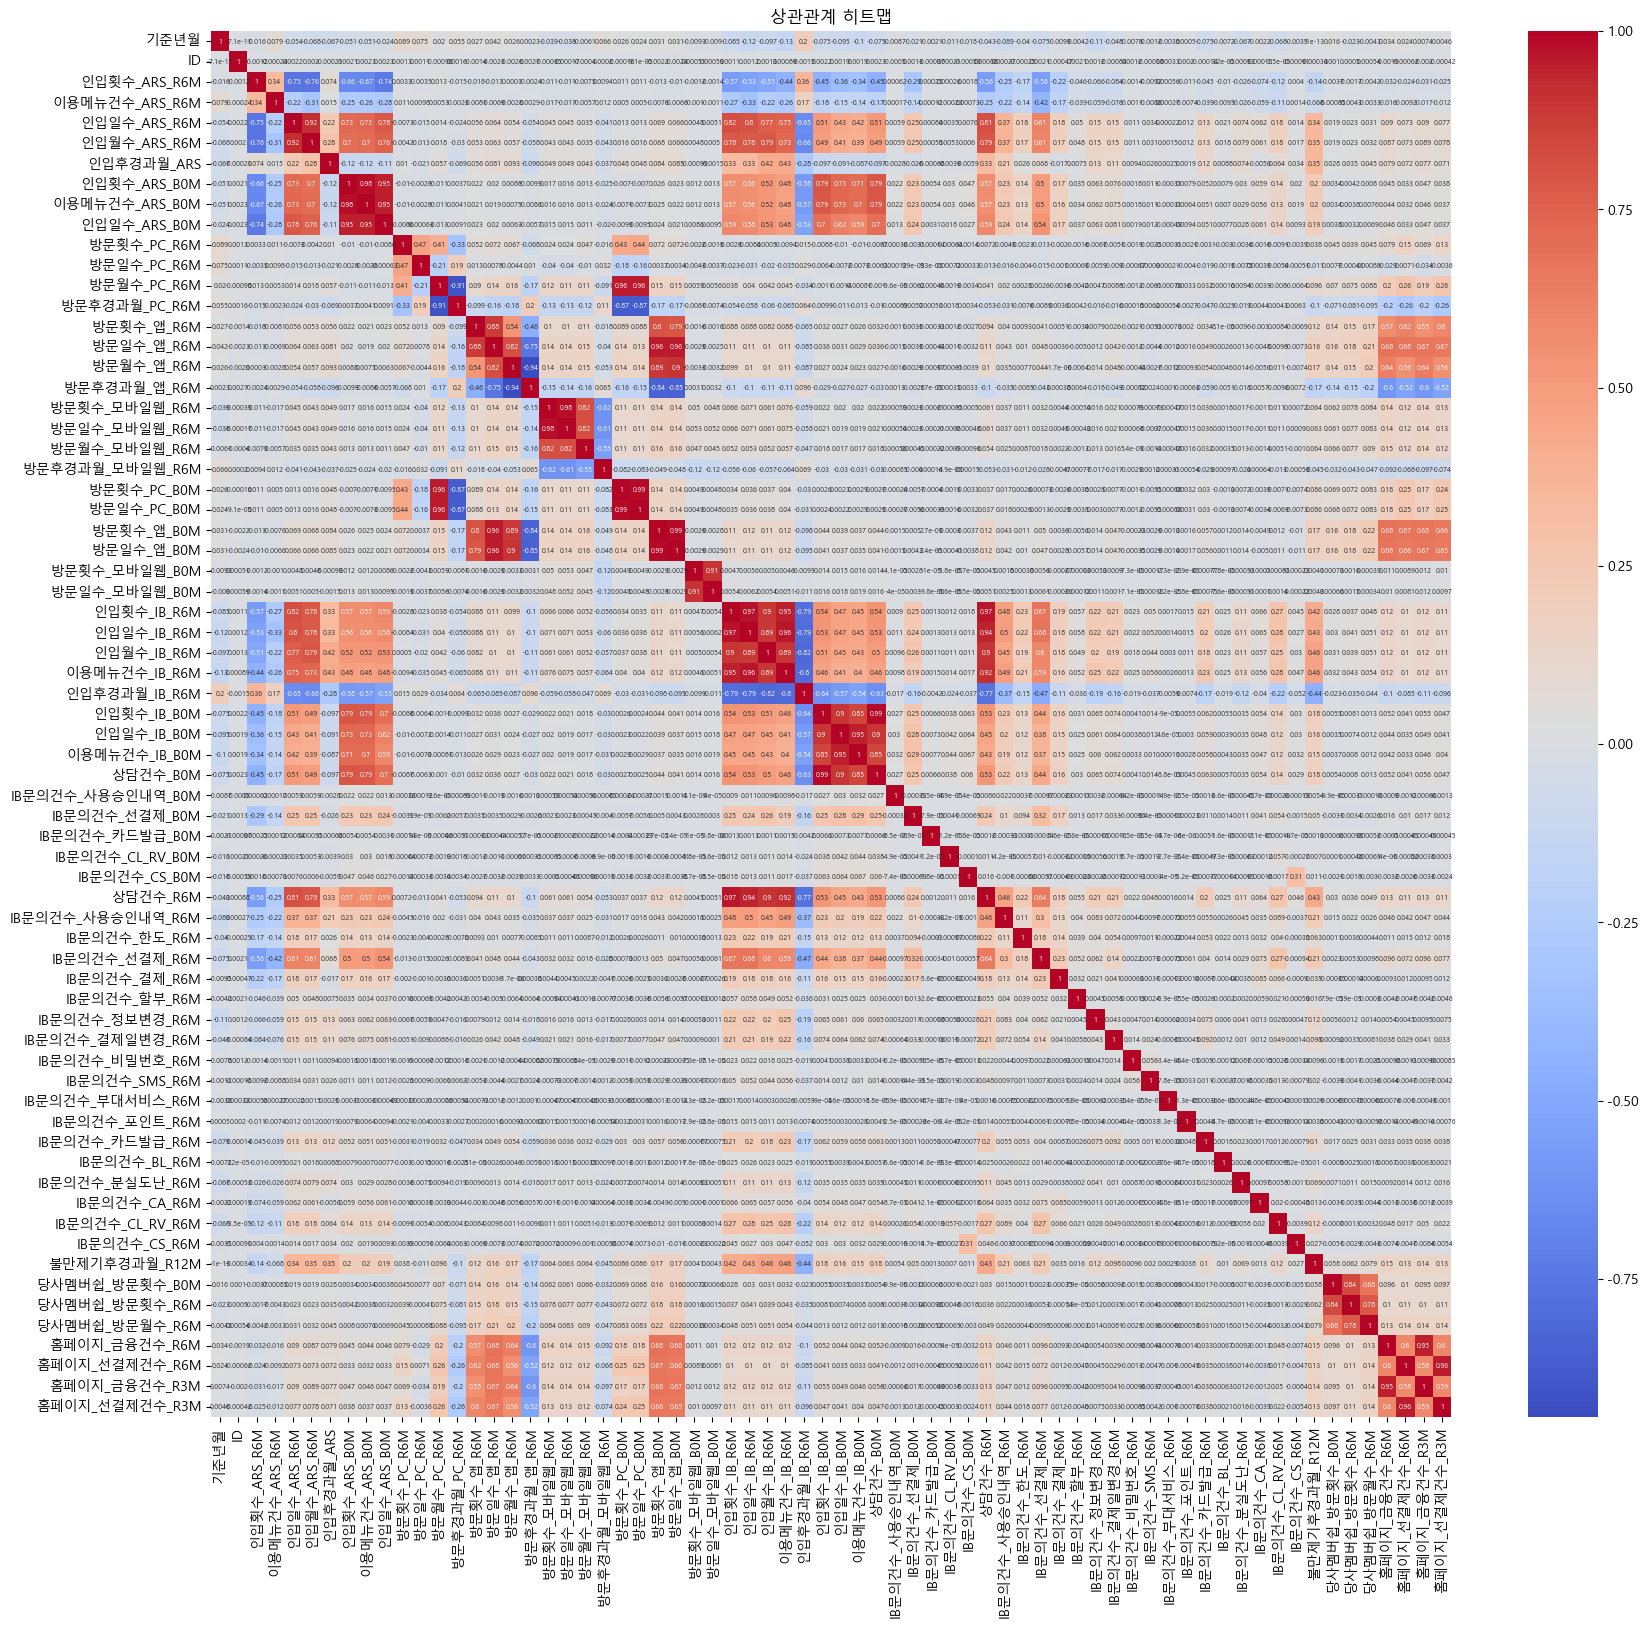

In [4]:
# 상관관계 분석 시각화

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 데이터 load
df = pd.read_parquet("open/train/6.채널정보/채널정보 월별 합본_전처리.parquet")

# 복사본 생성
df_corr = df.copy()

# Label Encoding
for col in df_corr.select_dtypes(include=['object', 'category']).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# float64 → float32 변환
for col in df_corr.select_dtypes(include='float64').columns:
    df_corr[col] = df_corr[col].astype('float32')

# int64 → int32 변환
for col in df_corr.select_dtypes(include='int64').columns:
    df_corr[col] = df_corr[col].astype('int32')

# 상관관계 행렬 계산
corr_matrix = df_corr.corr()

# 시각화 (옵션)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.title("상관관계 히트맵")
plt.show()

In [8]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 68 columns):
 #   Column             Dtype
---  ------             -----
 0   기준년월               int32
 1   ID                 int32
 2   인입횟수_ARS_R6M       int32
 3   이용메뉴건수_ARS_R6M     int32
 4   인입일수_ARS_R6M       int32
 5   인입월수_ARS_R6M       int32
 6   인입후경과월_ARS         int32
 7   인입횟수_ARS_B0M       int32
 8   이용메뉴건수_ARS_B0M     int32
 9   인입일수_ARS_B0M       int32
 10  방문횟수_PC_R6M        int32
 11  방문일수_PC_R6M        int32
 12  방문월수_PC_R6M        int32
 13  방문후경과월_PC_R6M      int32
 14  방문횟수_앱_R6M         int32
 15  방문일수_앱_R6M         int32
 16  방문월수_앱_R6M         int32
 17  방문후경과월_앱_R6M       int32
 18  방문횟수_모바일웹_R6M      int32
 19  방문일수_모바일웹_R6M      int32
 20  방문월수_모바일웹_R6M      int32
 21  방문후경과월_모바일웹_R6M    int32
 22  방문횟수_PC_B0M        int32
 23  방문일수_PC_B0M        int32
 24  방문횟수_앱_B0M         int32
 25  방문일수_앱_B0M         int32
 26  방문횟수_모바일웹_B0M      int32
 27  방문일수_모바일웹_B0